# 📊 Assignment 1 – Visualization Critique & Redesign

This notebook presents the redesign of two flawed real-world visualizations using Python and Matplotlib, along with explanations of the faults and how they were corrected.


## 📉 Visualization 1 – Overloaded Pie Chart

**Source:** Wikipedia ([Pie chart limitations](https://en.wikipedia.org/wiki/Pie_chart#Limitations))

### ❌ Problems:
- Too many categories: small slices hard to compare
- Poor labeling
- Ineffective for comparing similar values

### ✅ Fix:
- Switched to a sorted bar chart
- Added labels
- Clear axis and coloring


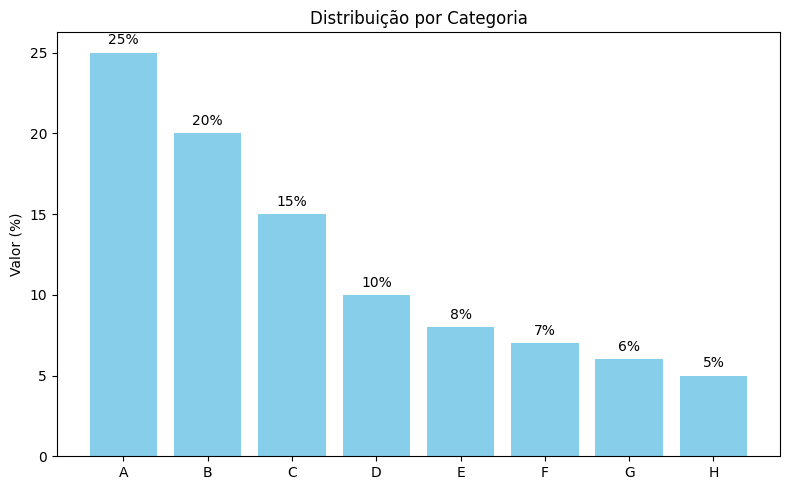

In [3]:
import matplotlib.pyplot as plt

# Example data
categorias = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
valores = [25, 20, 15, 10, 8, 7, 6, 5]

# Sort by value
categorias, valores = zip(*sorted(zip(categorias, valores), key=lambda x: -x[1]))

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(categorias, valores, color='skyblue')
plt.title("Distribuição por Categoria")
plt.ylabel("Valor (%)")

# Add labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{bar.get_height()}%', ha='center')

plt.tight_layout()
plt.savefig("redesign_visualizacao1.png")
plt.show()

## 🌍 Visualization 2 – Gradient of Voting Intensity

**Source:** Simulated data inspired by election maps

### ❌ Problems:
- Binary color schemes hide voting intensity nuances
- Lack of gradient to show close races
- Geographic size overemphasizes less populous areas

### ✅ Fix:
- Continuous color gradient centered at 50%
- Diverging colormap (blue-white-red) to show intensity
- Clear legend and uncluttered map visualization



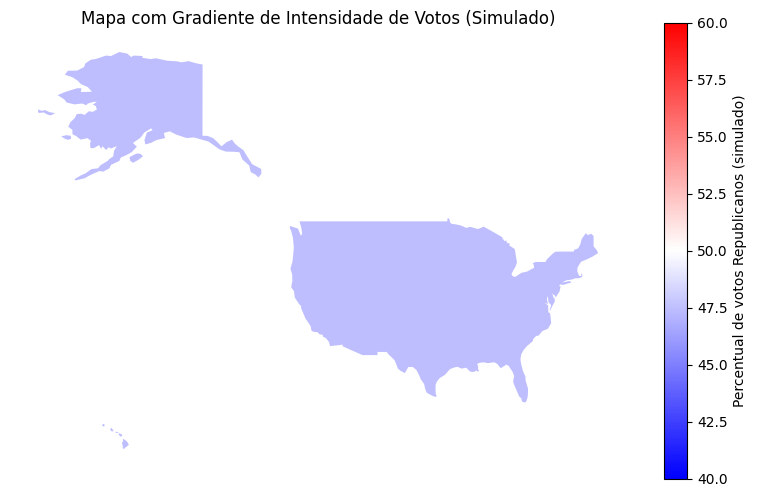

In [9]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Ajuste o caminho para o shapefile
shapefile_path = "datasets/ne_110m_admin_0_countries.shp"

world = gpd.read_file(shapefile_path)
usa = world[world["NAME"] == "United States of America"].copy()

# Simular percentuais de votos republicanos (entre 40% e 60%)
np.random.seed(42)
usa["GOP_percent"] = np.random.uniform(40, 60, size=len(usa))

# Plotar mapa com gradiente de cores centrado em 50%
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
usa.plot(column="GOP_percent", cmap="bwr", ax=ax, legend=True,
         legend_kwds={'label': "Percentual de votos Republicanos (simulado)"},
         vmin=40, vmax=60)

plt.title("Mapa com Gradiente de Intensidade de Votos (Simulado)")
ax.set_axis_off()
plt.tight_layout()
plt.savefig("redesign_visualizacao2.png")
plt.show()

